# Modelagem do Risco
## 2. Variância Condicional

Imports de Bibliotecas Básicas:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Modelos de variância condicional surgiram na literatura para levar em conta as características empíricas da volatilidade de retornos financeiros. Nos modelos econométricos convencionais, assume-se que a variância da série de preços é constante. No entanto, como visto no primeiro notebook desta série, a maior parte das séries temporais econômicas-financeiras exibem períodos de alta volatilidade seguidos por períodos de baixa volatilidade. Nessas circunstâncias, a suposição de variância constante ou **homocedasticidade** é inadequada. 

Como visto anteriormente no notebook 1, dados de retornos são estacionários e não correlacionados. No entanto os retornos *ao quadrado* tem correlação serial. Essa autocorrelação nos resíduos foram inicialmente modeladas por Engle (1982) com a introdução do modelo ARCH:
*AutoRegressive Conditional Heteroskedasticity*.


## ARCH - AutoRegressive Conditional Heteroskedasticity


Pelo fato de já termos observado as principais caracteísticas dos retornos, muitos conceitos aqui descritos decorrerão naturalmente. A grande contribuição de Engle foi propor um modelo para volatilidade condicional que utiliza a volatilidade condicional passada observada como parâmetro autoregressivo. Lembre-se que no caderno anterior definimos a variância dos retornos como $r_t^2$  tendo em vista que:

$$Var(r_t) = E(r_t - \bar{r}_t)^2$$
$$\Rightarrow E(r_t^2) - E(r_t)^2$$
$$\text{Como } E(r_t) = 0 $$
$$Var(r_t) = E(r_t^2)$$

Dado que sabemos que a variância não é constante no tempo, a estratégia proposta por Engle foi modelar a variância condicional como um processo AR(q) usando o *quadrado* dos retornos (ou resíduos, num contexto de regressão) como parâmetro autoregressivo:

$$ 
\sigma_t^2 = \omega + \alpha_1 r_{t-1}^2 + \alpha_2 r_{t-2}^2 + ... + \alpha_q r_{t-q}^2 + \varepsilon_t
$$
Simplificando
$$
\sigma_t^2 = \omega + \sum_{i=0}^q \alpha_i r_{t-i}^2 + \varepsilon_t
$$

Onde $\varepsilon_t$ é um ruído branco i.i.d tal que sua média e variância sejam respectivamente 0,1 - RB(0,1) e $r_t^2$ é a volatilidade observada no período t.

Na realidade, a especificação linear acima não é a mais adequada, dada que a estimação do modelo é feita por máxima verossimilhança. Neste contexto, uma das grandes observações de Engle foi propor o modelo num formato multiplicativo, retirando o termo estocástico da equação acima e adicionando fator multiplicativo na próprio processo gerador dos retornos subjascente. Por isso, podemos definir o processo gerador dos retornos como:

$$ r_t = \varepsilon_t \sigma_t$$
$$\text{onde}$$
$$\sigma_t^2 = \omega + \sum_{i=0}^q \alpha_i r_{t-i}^2$$


#### Propriedades do Modelo

##### Valor Esperado

Vimos na parte anterior que tratou dos fatos estilizados dos retornos que o valor esperado dos retornos ($r_t$) será 0. Como nós agora temos um processo gerador subjascente para os retornos e sabemos que por definição, temos que $\varepsilon_t \sim RB(0,1)$; se $E(\varepsilon_t)=0$, a esperança de $r_t$ é então definida por:

$$E(r_t) = E(\varepsilon_t) \sigma_t = 0$$

Note que neste caso $\sigma_t$ é um termo determinístico e por isso não recebe o operador de esperança. Adicionalmente, pela **lei das expectativas iteradas**, sabemos que tanto a média condicional como não condicional serão iguais a 0 $\rightarrow E(E(r_t | I_t)) = 0 $.

##### Autocorrelação

Adicionalmente, como $E(\varepsilon_t \varepsilon_{t-1}) = 0 $, decorre imediatamente que:

$$ E(r_t r_{t-1}) = 0 \quad i\neq 0$$

### Variância

A seguir, seguirão as derivações da variância condicional e não condicional do modelo: Lembre-se que o nosso interesse é modelar a variância condicional do processo gerador retornos. Variância não condicional se trata da média estacionária do modelo e é **diferente** da variância amostral do modelo.

Para fins de simplificação, considere um modelo ARCH(1) tal que:

$$r_t = \varepsilon_t \sigma_t$$
$$\sigma_t^2 = \omega + \alpha r_{t-1}^2$$

#####  Variância Condicional

Sendo $I_t$ a informação que chega ao mercado (ou simplesmente $r_{t-1}, r_{t-2},..., r_{t-q}$). Sabendo que a média ou valor esperado e $r_t$ é zero, define-se a variância condicional como:
$$Var(r_t | I_t) =E(\varepsilon_t\sigma_t)^2$$
$$Var(r_t | I_t) = E(\varepsilon_t^2)  \sigma_t^2$$
$$Var(r_t | I_t) = \sigma_t^2\\$$
$$Var(r_t | I_t) = \sigma_t^2 = \omega + \alpha r_{t-1}^2\\$$


##### Variância Não Condicional 

Utilizando a lei das expectativas iteradas, podemos definir a variância não condicional do modelo da seguinte forma:
$$Var(r_t) = E(E(r_t^2)) $$
$$\Rightarrow E(E(\varepsilon_t^2) \sigma_t^2) = E(\sigma_t^2)$$
$$\Rightarrow E(\sigma_t^2) = \omega + \alpha E(r_{t-1}^2)$$
$$\Rightarrow \bar{\sigma}^2 =\omega + \alpha \bar{\sigma}^2$$
$$\bar{\sigma}^2 = \frac{\omega}{(1-\alpha)}$$




Diferentemente de um modelo AR(q) tradicional, os valores dos coeficientes $\omega$ e $\alpha_1$ precisam ser limitados. Para assegurar que a variância condicional nunca seja negativa, é necessário assumir que ambos os valores serão positivos. Essa restrição é chamada de **condições de positividade**.

Caso $\omega$ seja negativo, uma perturbação suficientemente pequena em $r_{t−1}$ pode fazer com que variância condicional seja negativa. Da mesma forma, $\alpha_1$ for negativo, uma perturbação suficientemente grande em $r_{t−1}$ pode resultar em uma variância condicional negativa. Além disso, para manter a estabilidade do processo, ou seja, para que o processo seja convergente e estacionário $\alpha_1$ precisa ser limitado a $0 \leq \alpha_1 \leq 1$.

O aspecto crucial é que os retornos **não são independentes**, pois apesar de não correlacionados em nível, estão ligados pelo segundo momento (lembrando que correlação é uma relação linear). A própria variância condicional segue um padrão autoregressivo.

#### Simulando Processos ARCH

Com as relações que desenvolvemos acima, é simples simularmos um processo ARCH(q). É interessante observármos que de fato estamos simulando um processo de retornos financeiros. Criaremos 1000 observações (`n`) simuladas, definindo `e_t` como um processo ruído branco com média 0 e variância 1; `omega` = 1 e `alpha_1` = 0.6.

In [12]:
n = 1000
omega = 1
alpha_1 = .6
e_t = np.random.normal(size=n, loc=0, scale=1)

Como o processo gerador é dado por:

$$ r_t = \varepsilon_t\sigma_t $$

Como:

$$\sigma_t^2 = \omega + \alpha r_{t-1}^2$$
$$\Rightarrow \sigma_t = \sqrt{\omega + \alpha r_{t-1}^2}$$

Podemos reescrever a fórmula acima da seguinte forma:

$$ r_t = \varepsilon_t \sqrt{\omega + \alpha_1r_t^2}$$

Utilizando a equação acima, somos capazes de gerar um processo ARCH(q). Suponha que r_0 = 0, dessa forma:

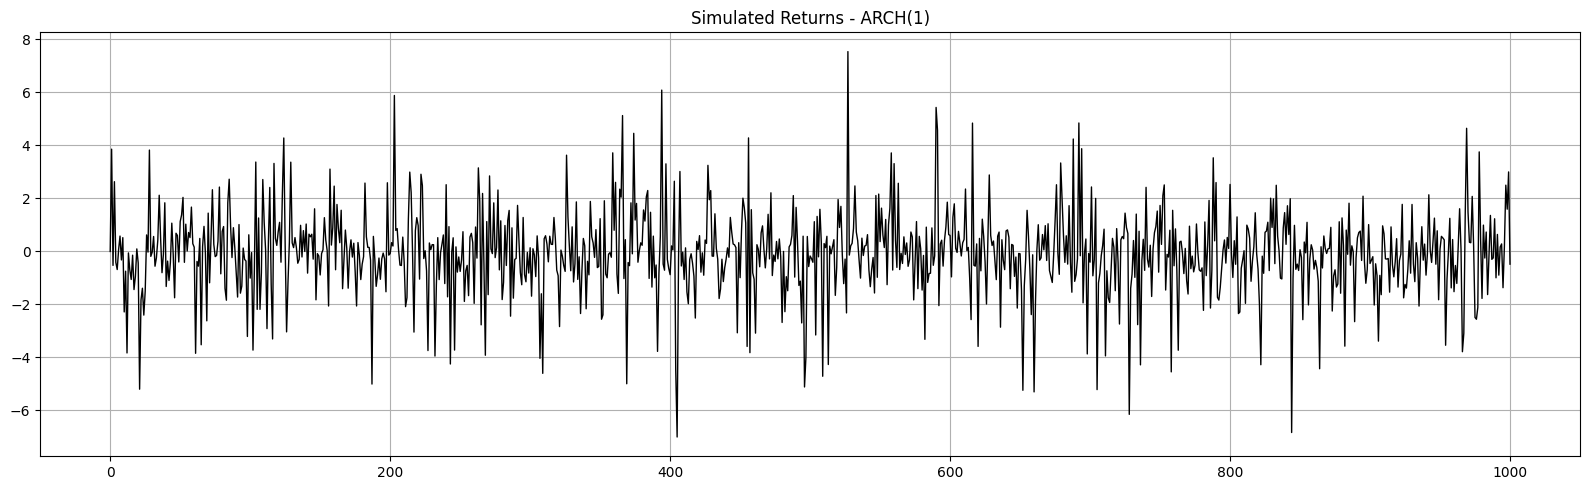

: 

In [17]:
# r_0 = 0
r_sim = [0]

# ARCH Process
for i in range(n):
    
    r_t = e_t[i]*np.sqrt(omega + alpha_1 * e_t[i]**2)
    r_sim.append(r_t)

# Plot Simulated Returns - ARCH Process
plt.figure(figsize=(16, 5))
plt.plot(r_sim, c='k', lw=1)
plt.grid(True)
plt.title("Simulated Returns - ARCH(1)")
plt.tight_layout()

#### Utilizando o a biblioteca `arch`

## GARCH - Generalized AutoRegressive Conditional Heteroskedasticity

###

#### Análise de Diagnóstico


retorno normalizado deverá ser !!!independente!!!!

### Família GARCH - Especificações Alternativas 

GARCH in Mean - Estrutura de volatilidade na média do processo gerador.

GJR GARCH/TARCH - Perdas tem um fator de aumentar a volatilidade mais que ganhos (efeito alavancagem).

IGARCH - GARCH Integrado alpha + beta proxima de 1 - série muito persistente

EGARCH - Modelar a log variancia, garante as condições de positividade.

VARIANCE TARGET - Restringe a estimação para que a variancia nao condicional seja a mesma que a variancia amostral. (Diminui a parametrização do modelo)

APGARCH - Restringe a estimação para que o retorno normalizado tenha necessariamente uma dist. normal 

SPLINEGARCH - Variancia nao condicional nao é constante, mas evolui de forma suave. Tendencia na variancia nao condicional. Spline (segunda variável pequena)

FIGARCH - $r_t^2$ segue um processo ARFIMA(p,d,q).

#### Referências 

BOLLERSLEV, T. Generalized autoregressive conditional heteroskedasticity. Journal of Econometrics, Vol. 31, p. 307-327, 1986.

BUENO, R. L. S. Econometria de Séries Temporais. São Paulo: Cengage Learning, 2011. Cap. 8.

ENDERS, W. Applied Econometric Time Series. 4th Edition. Hoboken, NJ: John Wiley & Sons, 2015. Cap. 3.

ENGLE, R. F. Autoregressive conditional heteroskedasticity with estimates of the variance of U.K. inflation. Econometrica, Vol. 50, p. 987-1008, 1982.

MORETTIN, P. A. Econometria Financeira. Um curso em séries temporais financeiras. 3 Ed. São Paulo: Edgard Blucher, 2017. Cap. 5.